## Tareas

**1) Diseñar nuestro modelo:** (input, output, size, forward pass)

**2) Construir "loss"(perdida) y "optimizer"(optimizador)**

**3) Bucle de entrenamiento:**
 - Forward pass: computar predicción
 - backward pass: gradientes
 - Actulizar los pesos 

In [1]:
import torch
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

## Preparamos los datos 

In [2]:
# Cargamos los datos de "datasets"
# X_numpy = Datos , y_numpy = Objetivo
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Comvertimos los datos a tensores
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Cambiamos la forma de tensor "y" hacemos que el numero de valores sea 0(0==1) y que tenga una columna
y = y.view(y.shape[0],1)

# Guardamos el numero de ejmplos y objentivos
n_samples, n_features = X.shape

## Modelo

In [3]:
# model prediction
def forward(x):
    return w * x

## Perdida(loss) y Optimizador(optmizer)

In [4]:
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

learning_rate = 1.00

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

## Bucle de entrenamiento

In [5]:
num_epocns = 100

for epoch in range(num_epocns):
    # predicción = forward pass
    y_pred = forward(X)
    
    # pérdida
    l = loss(y, y_pred)
    
    # grandients = backward() #Bueno no exatamente en parte por eso no se tienen los mismos ressultdos
    l.backward()
    
    #Actulizar los pesos
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    # Poner en cero los gradientes
    w.grad.zero_()
        
    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}: w = {w:.3f}, loos = {l:.8f}")

epoch: 10: w = 82.473, loos = 349.17565918
epoch: 20: w = 82.795, loos = 348.92608643
epoch: 30: w = 82.797, loos = 348.92605591
epoch: 40: w = 82.797, loos = 348.92605591
epoch: 50: w = 82.797, loos = 348.92605591
epoch: 60: w = 82.797, loos = 348.92605591
epoch: 70: w = 82.797, loos = 348.92605591
epoch: 80: w = 82.797, loos = 348.92605591
epoch: 90: w = 82.797, loos = 348.92605591
epoch: 100: w = 82.797, loos = 348.92605591


## Visulizacion

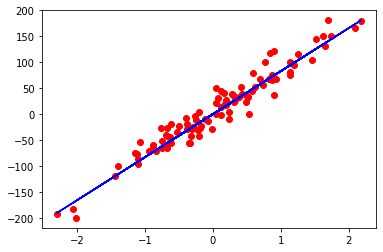

In [6]:
# guardamos los resultados de nuestro modelo aqui
predited = forward(X).detach().numpy()

# hacemos un grafico para ver los resultados
# Ponemos los resultados a predecir como puntos rojos
plt.plot(X_numpy, y_numpy, "ro")
# Trazamos una linea azul como nuestras predicciones
plt.plot(X_numpy, predited, "b")

#Mostramos el grafico
plt.show()